## Applied AI Assesment
## Face Mask Detection using Deep learning

In [1]:
# data set Source below
# https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset

### Import neccesary Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from keras import regularizers
import tensorflow as tf
import numpy as np
import cv2
import os
from PIL import Image
from sklearn.model_selection import train_test_split

2023-08-24 12:06:35.218194: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# pip install opencv-python
# !pip install Pillow

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')


In [5]:

trainpath = "./Face_Mask_Dataset/"

In [6]:
# retrieved from https://www.tutorialspoint.com/python/os_listdir.htm
# listing out images from their directories
with_mask = os.listdir(f"{trainpath}WithMask/")
without_mask = os.listdir(f"{trainpath}WithoutMask/")

In [7]:
with_mask_len = len(with_mask)
without_mask_len = len(without_mask)

In [8]:
print(f"total images with mask {with_mask_len} \
Total Image Without file {without_mask_len}")

total images with mask 2200 Total Image Without file 2200


In [9]:
without_mask[:2]

['No Mask_202.png', 'No Mask_2107.png']

In [10]:
with_mask[:5]

['Mask_1336.png',
 'Mask_2159.png',
 'Mask_1450.png',
 'Mask_1444.png',
 'Mask_318.png']

#### Plot of Image With and without mask

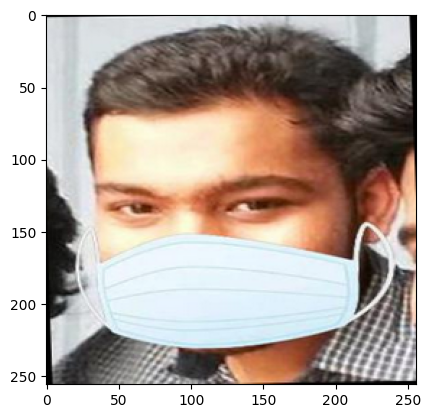

In [11]:
# retrieved from  https://stackoverflow.com/questions/35286540/display-an-image-with-python
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(f"{trainpath}WithMask/Mask_442.png")
imgplot = plt.imshow(img)
plt.show()

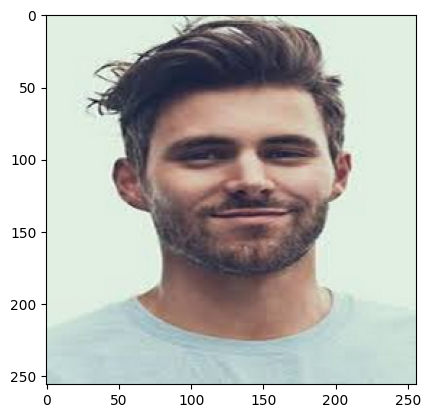

In [12]:
# retrieved from  https://stackoverflow.com/questions/35286540/display-an-image-with-python
img = mpimg.imread(f"{trainpath}WithoutMask/No Mask_2107.png")
imgplot = plt.imshow(img)
plt.show()
# 348.png

### Image preprocessing

I defined the function below for preprocessing task. it will help in reshaping the image, anc converting all images to RGB format. the function accepts image directry, and folder type by i kept WithMask as default folder type. Then it returns the processed image

In [13]:
# inspired by https://cloudinary.com/guides/bulk-image-resize/python-image-resize-with-pillow-and-opencv
# reshape Images so that they can maintain thesame shape

def resizeImage(imageDir,folderType ="WithMask" ):
    processed_images =[]
    for img in imageDir: # loop through masked images
        image = Image.open(f"{trainpath}{folderType}/{img}") # read Image
        new_image = image.resize((128, 128)) #reshape image to 120
        new_image = new_image.convert("RGB")
        processed_images.append(np.array(new_image)) #store the image to np_images list
    return processed_images

In [14]:
# Call the defined function for Image preprocessing
withMaskImages = resizeImage(with_mask)
withoutMaskImages = resizeImage(without_mask,"WithoutMask")

In [15]:
# concatenate masked and unmasked images together
combinedImages = withMaskImages + withoutMaskImages

In [16]:
combinedImages[0]

array([[[184, 178, 152],
        [185, 179, 153],
        [188, 182, 156],
        ...,
        [204, 196, 173],
        [200, 193, 171],
        [199, 193, 171]],

       [[186, 180, 154],
        [187, 181, 155],
        [190, 184, 158],
        ...,
        [202, 194, 171],
        [202, 195, 172],
        [194, 188, 166]],

       [[187, 181, 155],
        [188, 182, 157],
        [191, 185, 160],
        ...,
        [200, 193, 171],
        [203, 196, 175],
        [190, 183, 162]],

       ...,

       [[ 19,  39,  38],
        [ 16,  36,  35],
        [ 11,  31,  30],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 10,   9,   8]],

       [[ 16,  36,  35],
        [ 11,  31,  30],
        [  7,  27,  26],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [ 13,  12,  10]],

       [[ 15,  35,  34],
        [  8,  28,  27],
        [  4,  24,  23],
        ...,
        [  9,   9,   9],
        [  8,   8,   7],
        [ 15,  14,  11]]

### Label Creation for faces with mask and without mask

For this, I will represent image with mask as 1 and without mask as 0

In [17]:
# create label for with and without mask
withmask_label = [1 for i in range(with_mask_len)]
withoutmask_label = [0 for i in range(without_mask_len)]

In [18]:
# concat both label for masked and unmasked together
combined_label = withmask_label + withoutmask_label

In [19]:
combinedImages[0]

array([[[184, 178, 152],
        [185, 179, 153],
        [188, 182, 156],
        ...,
        [204, 196, 173],
        [200, 193, 171],
        [199, 193, 171]],

       [[186, 180, 154],
        [187, 181, 155],
        [190, 184, 158],
        ...,
        [202, 194, 171],
        [202, 195, 172],
        [194, 188, 166]],

       [[187, 181, 155],
        [188, 182, 157],
        [191, 185, 160],
        ...,
        [200, 193, 171],
        [203, 196, 175],
        [190, 183, 162]],

       ...,

       [[ 19,  39,  38],
        [ 16,  36,  35],
        [ 11,  31,  30],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 10,   9,   8]],

       [[ 16,  36,  35],
        [ 11,  31,  30],
        [  7,  27,  26],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [ 13,  12,  10]],

       [[ 15,  35,  34],
        [  8,  28,  27],
        [  4,  24,  23],
        ...,
        [  9,   9,   9],
        [  8,   8,   7],
        [ 15,  14,  11]]

### Set X and y Variables

In [20]:
# convert all the images to numpy array and assign to X 
X = np.array(combinedImages)
# convert all the labels to numpy array and assign to Y 
y = np.array(combined_label)

In [21]:
X[0]

array([[[184, 178, 152],
        [185, 179, 153],
        [188, 182, 156],
        ...,
        [204, 196, 173],
        [200, 193, 171],
        [199, 193, 171]],

       [[186, 180, 154],
        [187, 181, 155],
        [190, 184, 158],
        ...,
        [202, 194, 171],
        [202, 195, 172],
        [194, 188, 166]],

       [[187, 181, 155],
        [188, 182, 157],
        [191, 185, 160],
        ...,
        [200, 193, 171],
        [203, 196, 175],
        [190, 183, 162]],

       ...,

       [[ 19,  39,  38],
        [ 16,  36,  35],
        [ 11,  31,  30],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 10,   9,   8]],

       [[ 16,  36,  35],
        [ 11,  31,  30],
        [  7,  27,  26],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [ 13,  12,  10]],

       [[ 15,  35,  34],
        [  8,  28,  27],
        [  4,  24,  23],
        ...,
        [  9,   9,   9],
        [  8,   8,   7],
        [ 15,  14,  11]]

In [22]:
len(X)

4400

In [23]:
type(y)

numpy.ndarray

In [24]:
len(y)

4400

In [25]:
print(X.shape)

(4400, 128, 128, 3)


### Split Data into train and test

In [26]:
# use 20% for test 80% for trainning
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
# 80% of the data
X_train.shape

(3520, 128, 128, 3)

In [28]:
# 20% of the data
X_test.shape

(880, 128, 128, 3)

In [29]:
# http://carina.cse.lehigh.edu/Data_Analytics_Course/1.%20Image%20Classification%20using%20Neural%20Network.html
# normalize inputs from 0-255 to 0-1
X_train = X_train/ 255
X_test = X_test/ 255

In [30]:
X_train[0]

array([[[0.10980392, 0.10588235, 0.1372549 ],
        [0.09803922, 0.10196078, 0.13333333],
        [0.08627451, 0.09803922, 0.13333333],
        ...,
        [0.19215686, 0.18823529, 0.20784314],
        [0.2       , 0.20392157, 0.21176471],
        [0.22352941, 0.22352941, 0.23137255]],

       [[0.11764706, 0.11764706, 0.14901961],
        [0.11764706, 0.11764706, 0.15294118],
        [0.09803922, 0.10980392, 0.14117647],
        ...,
        [0.21960784, 0.21568627, 0.23529412],
        [0.21176471, 0.21176471, 0.21960784],
        [0.21960784, 0.21960784, 0.22352941]],

       [[0.14117647, 0.14117647, 0.17254902],
        [0.14509804, 0.14117647, 0.17647059],
        [0.12941176, 0.1372549 , 0.16862745],
        ...,
        [0.21568627, 0.21960784, 0.23529412],
        [0.21960784, 0.21568627, 0.23137255],
        [0.21960784, 0.21568627, 0.22745098]],

       ...,

       [[0.70196078, 0.77647059, 0.81176471],
        [0.57647059, 0.65098039, 0.68627451],
        [0.36078431, 0

### Building  Neural Network Model Architecture Using keras 

First i will be Using 2 convolutional layers and then try with 3 layers with optimizers

In [37]:
# referenced from my understanding AI lab work
model = Sequential()
# first convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(128,activation = 'relu'))
# in case of overfitting
model.add(Dropout(0.2))

# # Dense layer
model.add(Dense(64,activation = 'relu'))
# in case of overfitting
model.add(Dropout(0.2))

# number of the neuron has to be the number of class
# in my case, i have 2 classes (masked and unmasked)
# here also, i am using sigmoid because i am dealing with binary problem
model.add(Dense(2,activation = 'sigmoid'))

In [38]:
# print the summary of the model constructed
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 61504)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [39]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [40]:
len(X_train)

3520

In [41]:
len(X_test)

880

In [42]:
# train the model with 5 epocs, use 20% for validation
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
88/88 [==============================] - 43s 458ms/step - loss: 0.5113 - acc: 0.7713 - val_loss: 0.2767 - val_acc: 0.8835
Epoch 2/5
88/88 [==============================] - 41s 466ms/step - loss: 0.2376 - acc: 0.9013 - val_loss: 0.2185 - val_acc: 0.9148
Epoch 3/5
88/88 [==============================] - 40s 458ms/step - loss: 0.1785 - acc: 0.9286 - val_loss: 0.3442 - val_acc: 0.8494
Epoch 4/5
88/88 [==============================] - 41s 469ms/step - loss: 0.1346 - acc: 0.9471 - val_loss: 0.2381 - val_acc: 0.9304
Epoch 5/5
88/88 [==============================] - 42s 470ms/step - loss: 0.1030 - acc: 0.9613 - val_loss: 0.2417 - val_acc: 0.9247


In [43]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14979563653469086
Test accuracy: 0.9477272629737854


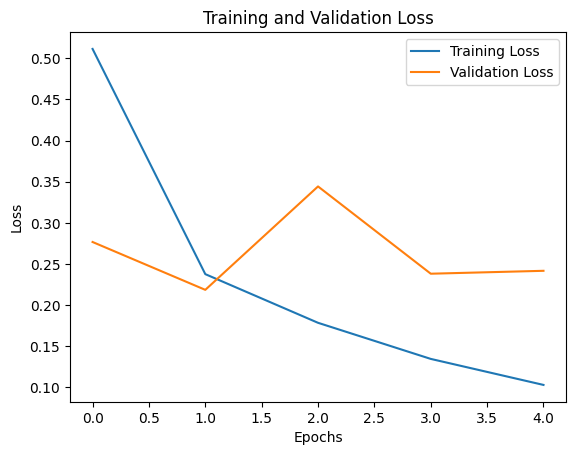

In [44]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

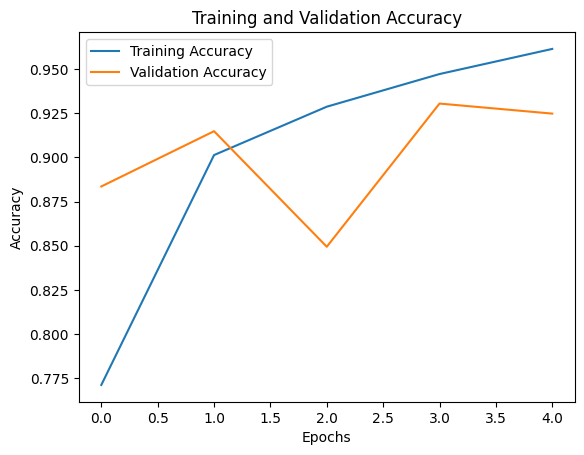

In [45]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['acc'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_acc'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

### In the above model, Cases of Overfitting were discovered at some points
I have added another Convolutional block to make it 3 layers, I added droupout  and I also increased epoch to 8 to compare the performance

In [46]:
from keras import regularizers


In [48]:
# referenced from my understanding AI lab work
model2 = Sequential()
# first convolutional layer
model2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer
model2.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

# # # Third layer
model2.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))


# flatten layer
model2.add(Flatten())

# Dense layer
model2.add(Dense(128,activation = 'relu'))
# in case of overfitting
model2.add(Dropout(0.8))

# # Dense layer
model2.add(Dense(64,activation = 'relu'))
# in case of overfitting
model2.add(Dropout(0.8))

# number of the neuron has to be the number of class
# in my case, i have 2 classes (masked and unmasked)
# here also, i am using sigmoid because i am dealing with binary problem
model2.add(Dense(2,activation = 'sigmoid'))

In [49]:
optimizer = SGD(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])

In [50]:
history2 = model2.fit(X_train, y_train, validation_split=0.1, epochs=8)

Epoch 1/8
99/99 [==============================] - 55s 547ms/step - loss: 0.7130 - acc: 0.4886 - val_loss: 0.6902 - val_acc: 0.5852
Epoch 2/8
99/99 [==============================] - 53s 536ms/step - loss: 0.6953 - acc: 0.5155 - val_loss: 0.6895 - val_acc: 0.5909
Epoch 3/8
99/99 [==============================] - 53s 528ms/step - loss: 0.6943 - acc: 0.5189 - val_loss: 0.6881 - val_acc: 0.6903
Epoch 4/8
99/99 [==============================] - 53s 534ms/step - loss: 0.6896 - acc: 0.5246 - val_loss: 0.6859 - val_acc: 0.6392
Epoch 5/8
99/99 [==============================] - 54s 542ms/step - loss: 0.6876 - acc: 0.5439 - val_loss: 0.6849 - val_acc: 0.6392
Epoch 6/8
99/99 [==============================] - 52s 524ms/step - loss: 0.6887 - acc: 0.5284 - val_loss: 0.6846 - val_acc: 0.7443
Epoch 7/8
99/99 [==============================] - 56s 567ms/step - loss: 0.6873 - acc: 0.5354 - val_loss: 0.6809 - val_acc: 0.7301
Epoch 8/8
99/99 [==============================] - 53s 530ms/step - loss: 0.

In [ ]:
# above running

In [51]:
score2 = model2.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.6793856024742126
Test accuracy: 0.7340909242630005


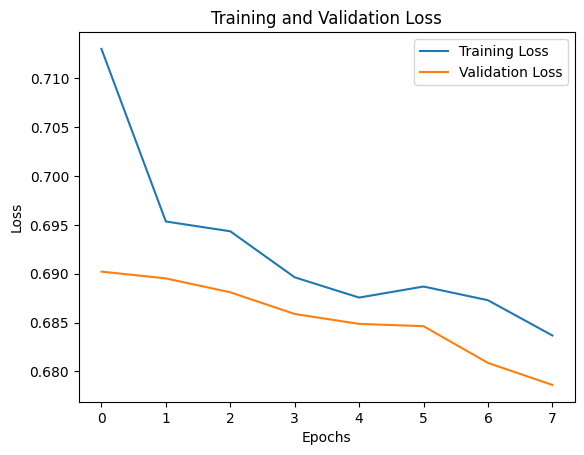

In [52]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history2.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history2.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

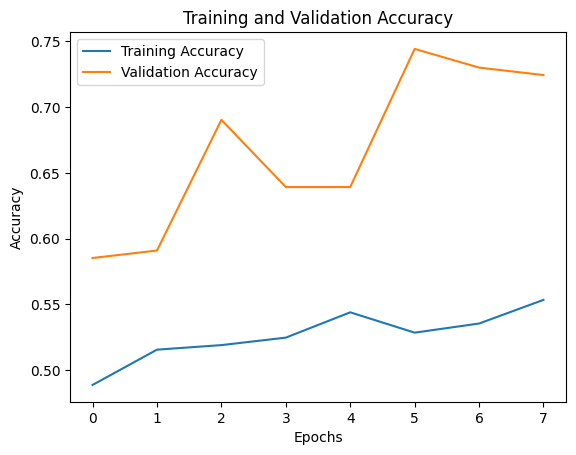

In [53]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history2.history['acc'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history2.history['val_acc'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [ ]:
# optimizer = SGD(learning_rate=0.001, momentum=0.9)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### trying with 3 blocks, l2 regularization and drop out to see if I will have a better performance

In [54]:
from keras.regularizers import l2  # Import L2 regularization


In [55]:
# current1

In [56]:
# referenced from my understanding AI lab work
model3 = Sequential()
# first convolutional layer
model3.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu', padding="same"))
model3.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer
model3.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

# # # Third layer
model3.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

# flatten layer
model3.add(Flatten())

# Dense layer
model3.add(Dense(128,activation = 'relu'))
# in case of overfitting
model3.add(Dropout(0.8))

# # Dense layer
model3.add(Dense(64,activation = 'relu'))
# in case of overfitting
model3.add(Dropout(0.8))

# Add layers to the model with L2 regularization
model3.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model3.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# number of the neuron has to be the number of class
# in my case, i have 2 classes (masked and unmasked)
# here also, i am using sigmoid because i am dealing with binary problem
model3.add(Dense(2,activation = 'sigmoid'))

In [ ]:
# from keras.callbacks import EarlyStopping

In [57]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [58]:
history3 = model3.fit(X_train, y_train, validation_split=0.1, epochs=8)

Epoch 1/8
99/99 [==============================] - 59s 576ms/step - loss: 1.7684 - acc: 0.6013 - val_loss: 1.2280 - val_acc: 0.8494
Epoch 2/8
99/99 [==============================] - 55s 553ms/step - loss: 0.9530 - acc: 0.8021 - val_loss: 0.6972 - val_acc: 0.8438
Epoch 3/8
99/99 [==============================] - 56s 561ms/step - loss: 0.6001 - acc: 0.8554 - val_loss: 0.4794 - val_acc: 0.8722
Epoch 4/8
99/99 [==============================] - 55s 552ms/step - loss: 0.4393 - acc: 0.8794 - val_loss: 0.3533 - val_acc: 0.8920
Epoch 5/8
99/99 [==============================] - 55s 550ms/step - loss: 0.3520 - acc: 0.8946 - val_loss: 0.2693 - val_acc: 0.9176
Epoch 6/8
99/99 [==============================] - 55s 553ms/step - loss: 0.2892 - acc: 0.9160 - val_loss: 0.2402 - val_acc: 0.9290
Epoch 7/8
99/99 [==============================] - 54s 542ms/step - loss: 0.2439 - acc: 0.9217 - val_loss: 0.2093 - val_acc: 0.9290
Epoch 8/8
99/99 [==============================] - 55s 552ms/step - loss: 0.

In [60]:
score3 = model3.evaluate(X_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14979563653469086
Test accuracy: 0.9477272629737854


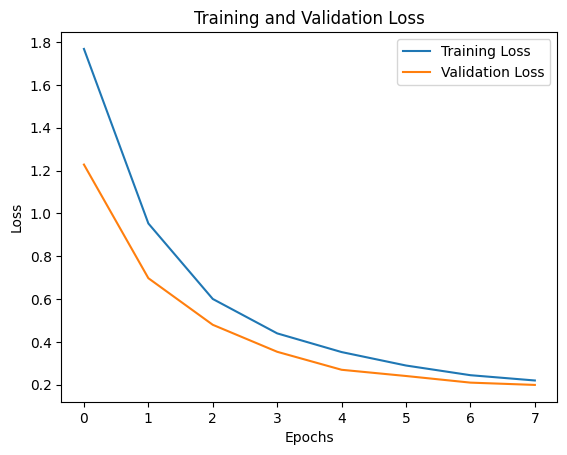

In [61]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history3.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history3.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

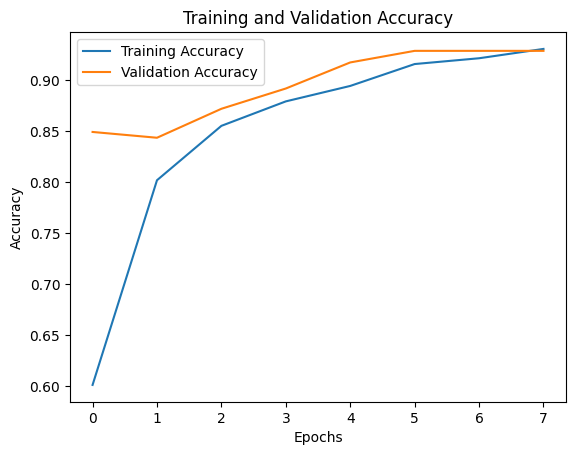

In [62]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history3.history['acc'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history3.history['val_acc'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [ ]:
# data augumentation to be added here also to check the performace

In [63]:
# performing data augmentation on image dataset with rotation 20
train_datagen = ImageDataGenerator(
    rotation_range=10, # Randomly rotate images up to 10 degrees
    width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
    height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
    horizontal_flip=True, # Randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
    shear_range=0.1, # crops part of the image
    zoom_range=0.1 # #zooms the image by 10%
)

In [66]:
# Fit the transformation to the training dataset
train_datagen.fit(X_train)

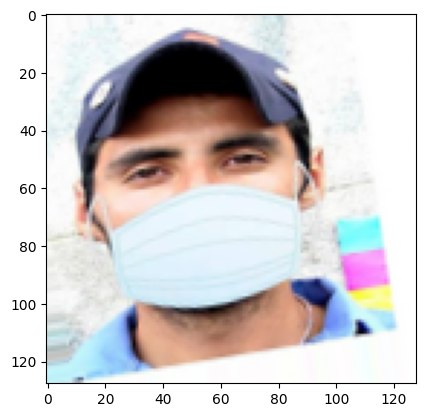

In [67]:
# showing sample of a transformation
plt.imshow(train_datagen.random_transform(X_train[1]))

In [88]:
# referenced from my understanding AI lab work
model4 = Sequential()
# first convolutional layer
model4.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,3),activation = 'relu', padding="same"))
model4.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer
model4.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(BatchNormalization())
# # # # Third layer
# model4.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
# model4.add(MaxPooling2D(pool_size=(2,2)))
# model4.add(BatchNormalization())
# # # fourth layer
# model4.add(Conv2D(filters=256,kernel_size=(3,3),activation = 'relu'))
# model4.add(MaxPooling2D(pool_size=(2,2)))
# model4.add(BatchNormalization())

# flatten layer
model4.add(Flatten())


# # Dense layer
model4.add(Dense(64,activation = 'relu'))
# in case of overfitting
model4.add(Dropout(0.5))
model4.add(BatchNormalization()) 

# Dense layer
model4.add(Dense(128,activation = 'relu'))
# in case of overfitting
model4.add(Dropout(0.5))
model4.add(BatchNormalization())

# Add layers to the model with L2 regularization
model4.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model4.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# number of the neuron has to be the number of class
# in my case, i have 2 classes (masked and unmasked)
# here also, i am using sigmoid because i am dealing with binary problem
model4.add(Dense(2,activation = 'sigmoid'))

In [89]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model4.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['acc'])

In [90]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 31, 31, 64)       256       
 chNormalization)                                                
                                                      

In [91]:
from tensorflow.keras.callbacks import EarlyStopping


In [92]:
# Create EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=3,             # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True   # Restore model weights from the epoch with the best value of the monitored metric
)

In [93]:
# history4 = model.fit(
#     train_datagen.flow(X_train, y_train, batch_size=32),
#     epochs=8,
#     validation_data=(X_test, y_test),
#     callbacks=[early_stopping]
# )

In [94]:
history4 = model4.fit(X_train, y_train, 
                      validation_split=0.1,
#                       callbacks=[early_stopping], 
                      epochs=8)

Epoch 1/8
99/99 [==============================] - 48s 457ms/step - loss: 2.7852 - acc: 0.5931 - val_loss: 2.7496 - val_acc: 0.6676
Epoch 2/8
99/99 [==============================] - 43s 433ms/step - loss: 2.5176 - acc: 0.7689 - val_loss: 2.6101 - val_acc: 0.8551
Epoch 3/8
99/99 [==============================] - 61s 617ms/step - loss: 2.3272 - acc: 0.8460 - val_loss: 2.4270 - val_acc: 0.8864
Epoch 4/8
99/99 [==============================] - 74s 746ms/step - loss: 2.1977 - acc: 0.8681 - val_loss: 2.2669 - val_acc: 0.8835
Epoch 5/8
99/99 [==============================] - 58s 590ms/step - loss: 2.0926 - acc: 0.8860 - val_loss: 2.0771 - val_acc: 0.8722
Epoch 6/8
99/99 [==============================] - 62s 630ms/step - loss: 2.0035 - acc: 0.8952 - val_loss: 1.9732 - val_acc: 0.8864
Epoch 7/8
99/99 [==============================] - 61s 607ms/step - loss: 1.9158 - acc: 0.9025 - val_loss: 1.9282 - val_acc: 0.8693
Epoch 8/8
73/99 [=====================>........] - ETA: 15s - loss: 1.8529 -

KeyboardInterrupt: 